In [1]:
import importlib
import skfda

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Utils import paths


importlib.reload(paths)

<module 'Utils.paths' from 'C:\\Users\\jllav\\IdeaProjects\\TFM\\Utils\\paths.py'>

In [3]:
X = pd.read_pickle(f'{paths.CC_DATA_PATH}/X.pickle')
y = pd.read_pickle(f'{paths.CC_DATA_PATH}/y.pickle')
X.shape, y.shape

((538, 2399), (538,))

In [4]:
X.index[X.isna().sum(axis=1) != 0]

Int64Index([], dtype='int64')

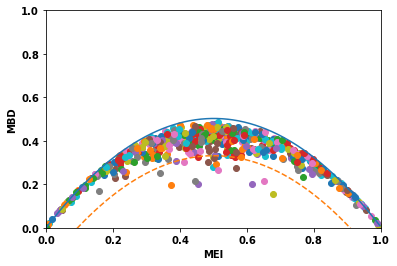

In [33]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
outliergram = skfda.exploratory.visualization.Outliergram(fdata=X_fd)
outliergram.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram.png")

In [34]:
outliers_idx = X.index[np.where(outliergram.outlier_detector.fit_predict(X_fd) == -1, True, False)]
outliers_idx

Int64Index([1007, 1009, 1010, 1027, 1035, 1055, 1081, 1169, 1197, 1198, 1312,
            1345, 1388, 1409, 1418, 1482, 2024],
           dtype='int64')

In [32]:
y[outliers_idx].value_counts()

0    11
1     6
Name: ph, dtype: int64

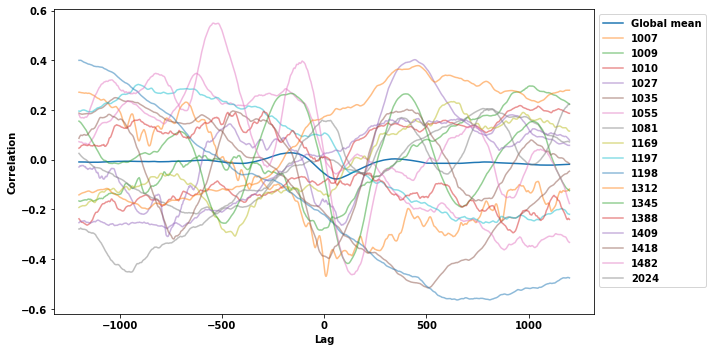

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in outliers_idx:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram_outliers.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram_outliers.png")
